In [13]:
from ase.atoms import Atoms
import numpy as np
from ase.build import molecule
from readysetgo.structure_clustering.clustering_algorithms import ClusteringAlgorithm, HashingClusteringAlgorithm
from readysetgo.structure_clustering.global_descriptors import AtomicDistancesDescriptor

from ase.io import read
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
os.chdir('/home/holland/repos/ReadySetGO/src/readysetgo/structure_clustering/clustering_algorithms')


def get_structure_number_data(nto_group_dict):
    unique_structures_list = []
    for n_to in nto_group_dict:
        unique_structures_list.append(len(nto_group_dict[n_to]))

    return np.mean(unique_structures_list), np.std(unique_structures_list)

def plot_means(means, stds):
    plt.errorbar(range(len(means)), means, yerr=stds, fmt='-')
    plt.xlabel('Rattle Iteration')
    plt.ylabel('Number of Unique Structures')
    plt.title('Unique Structures vs. Rattle Iteration')
    plt.show()

def plot_ns(ns_list):
    plt.plot(range(len(ns_list)), ns_list, marker='o')
    plt.xlabel('Rattle Iteration')
    plt.ylabel('Number of Unique Structures')
    plt.title('Unique Structures vs. Rattle Iteration')
    plt.show()




In [ ]:

means=[]
stds=[]

def new_atoms_lists():
    new_atoms_lol=[]
    for j in tqdm(range(100), disable=False):
        atoms_list = read(f"out/H2O_rattle_{j}.extxyz", ":")

        new_atoms_list = []
        i = 0
        for atoms in atoms_list:
            new_atoms = atoms.copy()
            # new_atoms.rattle(0.01, rng=np.random)
            new_atoms.info["global_descriptor"] = AtomicDistancesDescriptor(
                new_atoms
            ).make_char_vec()
            new_atoms.info["id"] = i
            i += 1
            new_atoms_list.append(new_atoms)
        new_atoms_lol.append(new_atoms_list)
    return new_atoms_lol

def run_hashing(ar=0.5, ct=0.01, nz=10, sr=0, new_atoms_lol=[]):
    ns_list=[]
    unit_cell=new_atoms_lol[0][0].cell
    max_gd_value= np.sqrt(np.sum([unit_cell[0][0], unit_cell[1][1], unit_cell[2][2]]))
    for new_atoms_list in new_atoms_lol:
        hashing_object = HashingClusteringAlgorithm(
            clustering_tolerance=ct, atoms_list=[new_atoms_list[0]], normalizations=nz, acceptance_rate=ar
        )
        hashing_dict=hashing_object.create_hashing_dict( )
        new_structures=1

        for i in range(sr, len(new_atoms_list)):
            new_structure, new_hashing_dict=hashing_object.add_new_atoms(new_atoms_list[i], max_gd_value, hashing_dict)
            hashing_dict = new_hashing_dict
            new_structures += int(new_structure)

        ns_list.append(new_structures)
    return ns_list

        
    #     nto_hash_dict=HashingClusteringAlgorithm(
    #         clustering_tolerance=0.01, atoms_list=new_atoms_list
    #     ).create_array_from_atoms_list()


    # print(means)

In [10]:
new_atoms_lol = new_atoms_lists()

100%|██████████| 99/99 [00:52<00:00,  1.89it/s]


100%|██████████| 11/11 [01:25<00:00,  7.75s/it]


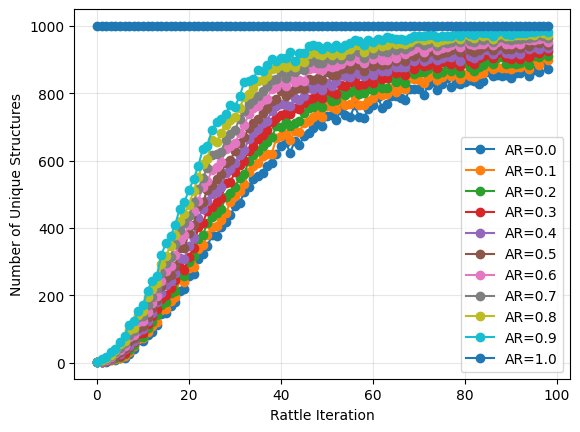

NameError: name 'pd' is not defined

In [ ]:
# plot_means(means, stds)
plt.clf()
ns_array = np.zeros((11, 100))  # Assuming max length of ns_list is 100
for i in tqdm(range(11)):
    ns_list = run_hashing(ar=0+(i/10), ct=0.01, nz=10, sr=0, new_atoms_lol=new_atoms_lol)
    ns_array[i, :len(ns_list)] = ns_list
    plt.plot(range(len(ns_list)), ns_list, marker='o', label=f'AR={0+(i/10)}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel('Rattle Iteration')
plt.ylabel('Number of Unique Structures')
plt.savefig('hashing_clustering_acceptance_rate.png', dpi=300)
plt.show()
# Save the results to a CSV file


In [16]:
pd.DataFrame(ns_array.T, columns=[f'AR={0+(i/10)}' for i in range(11)]).to_csv('hashing_clustering_acceptance_rate.csv')

In [31]:


base_list = run_hashing(ar=0.4, ct=0.01, nz=200, sr=0, new_atoms_lol=new_atoms_lol)


In [34]:
plt.clf()

means=[]
for i in tqdm(range(1,20)):
    ns_arr = np.array(run_hashing(ar=0.4, ct=0.01, nz=3*i, sr=0, new_atoms_lol=new_atoms_lol))
    print(np.mean(np.abs(ns_arr-base_list)))
    means.append(np.mean(np.abs(ns_arr-base_list)))


  5%|▌         | 1/19 [00:03<01:08,  3.83s/it]

19.535353535353536


 11%|█         | 2/19 [00:09<01:23,  4.90s/it]

2.4343434343434343
4.141414141414141


 21%|██        | 4/19 [00:27<01:58,  7.93s/it]

6.717171717171717


 26%|██▋       | 5/19 [00:39<02:09,  9.23s/it]

5.444444444444445


 32%|███▏      | 6/19 [00:53<02:19, 10.74s/it]

2.4646464646464645


 37%|███▋      | 7/19 [01:09<02:29, 12.45s/it]

1.0


 42%|████▏     | 8/19 [01:27<02:37, 14.30s/it]

1.8888888888888888


 47%|████▋     | 9/19 [01:47<02:42, 16.29s/it]

3.202020202020202


 53%|█████▎    | 10/19 [02:11<02:46, 18.53s/it]

2.5454545454545454


 58%|█████▊    | 11/19 [02:37<02:45, 20.70s/it]

1.1818181818181819


 63%|██████▎   | 12/19 [03:01<02:31, 21.66s/it]

0.6767676767676768


 68%|██████▊   | 13/19 [03:27<02:18, 23.08s/it]

1.2424242424242424


 74%|███████▎  | 14/19 [03:55<02:02, 24.46s/it]

2.3535353535353534


 79%|███████▉  | 15/19 [04:24<01:43, 25.92s/it]

1.6767676767676767


 84%|████████▍ | 16/19 [04:59<01:26, 28.69s/it]

0.7070707070707071


 89%|████████▉ | 17/19 [05:32<00:59, 29.87s/it]

0.5656565656565656


 95%|█████████▍| 18/19 [06:06<00:31, 31.34s/it]

1.0909090909090908


100%|██████████| 19/19 [06:42<00:00, 21.20s/it]

1.7373737373737375


<Figure size 640x480 with 0 Axes>

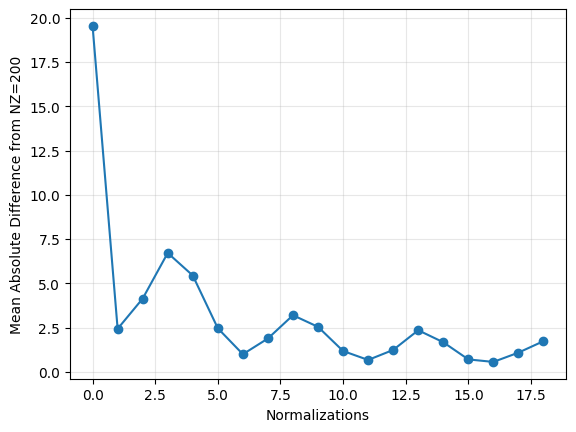

In [36]:

plt.plot(range(len(means)), means, marker='o')
plt.grid(True, alpha=0.3)
plt.xlabel('Normalizations')  
plt.ylabel('Mean Absolute Difference from NZ=200')
plt.savefig('mean_abs_diff_normalizations.png', dpi=300)
plt.show()


In [25]:
pd.DataFrame(ns_array.T, columns=[f'NZ={5*i}' for i in range(11)]).to_csv('hashing_clustering_normalizations.csv')

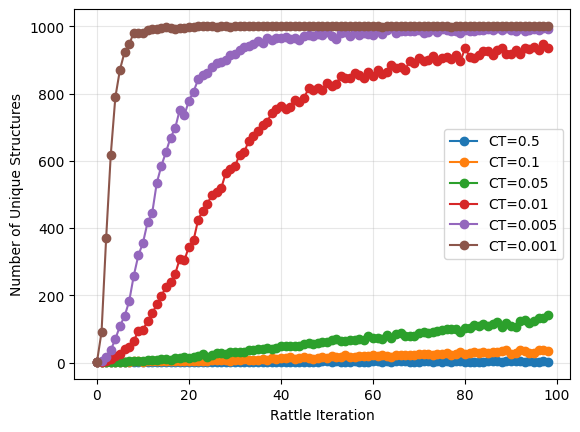

In [29]:
plt.clf()
ns_array = np.zeros((6, 100))  # Assuming max length of ns_list is 100
ct_list=[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
for i, ct in enumerate(ct_list):
    ns_list = run_hashing(ar=0.4, ct=ct, nz=15, sr=0, new_atoms_lol=new_atoms_lol)
    ns_array[i, :len(ns_list)] = ns_list
    plt.plot(range(len(ns_list)), ns_list, marker='o', label=f'CT={ct}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel('Rattle Iteration')  
plt.ylabel('Number of Unique Structures')
plt.savefig('hashing_clustering_clustering_thresholds.png', dpi=300)
plt.show()


In [30]:
pd.DataFrame(ns_array.T, columns=[f'CT={ct_list[i]}' for i in range(6)]).to_csv('hashing_clustering_thresholds.csv')